# Tutorial 1: Loading and Preprocessing a BioLINNC Study

*Authors: Chirag Nagpal <<chiragn@cs.cmu.edu>>*

**Hello ! Welcome to the Auton Survival Package!**

At Auton Lab, large amount of research is focussed on analyzing healthcare data from randomized clinical controlled trials. These data were collected typically to estimate if a medical intervention (like a drug of a certain kind, or a surgical operation) improves outcomes for the population at large (in statstical terms, on average).

We aim to retrospecitively restudy this data and find out if there were certain subgroups or demographics of individuals who would benefit more (or less) from the population on average. In clinical terms, this identifaction is called *Phenotyping*.

In the first tutorial, we will study how to load data and perform some basic preprocessing on the dataset, please follow this notebook and try to reproduce the results here ! 

**Learning objectives**: 

    - Loading a BioLINCC Randomized Trial Dataset using the `auton_survival` package.
    - Plotting Survival and Cumulative Hazard rates with the `auton_survival.reporting` module.
    - Preprocessing the baseline physiological variables using the `auton_survival.preprocessing` module.

In [2]:
import sys
sys.path.append('../')

In [16]:
from auton_survival.datasets import load_allhat

# The `location` argument should point where the `ALLHAT/ALLHAT_v2016a/DATA/...` folder is.
# The `endpoint` argument indicates which outcome or endpoint should be extracted by the function.

outcomes, features = load_allhat(location='../../../', endpoint='STROKE')

No Features Specified!! using default baseline features.


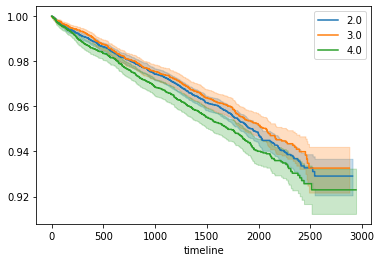

Group: 2.0
Group: 3.0
Group: 4.0


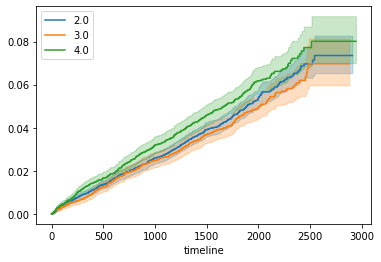

In [28]:
from auton_survival.reporting import plot_kaplanmeier, plot_nelsonaalen

# Plot the Kaplan-Meier Survival Curves and the Nelson-Aalen cumulative
# Hazard rates stratified by intervention arm.

plot_kaplanmeier(outcomes, features['RZGROUP'])
plot_nelsonaalen(outcomes, features['RZGROUP'])

# Preprocessing

The `auton_survival.preprocessing` module allows the user to perform two key aspects of the preprocessing workflow - imputation and scaling. Imputation handles any missing data within the dataset, and scaling will change the values of continuous variables to make them more model-friendly. There are different techniques implemented for each class.

In [29]:
# Explicitly identify categorical and numerical features, so the Preprocessor class will be able to
# separate them.

categorical_features = ['RZGROUP', 'RACE', 'HISPANIC', 'ETHNIC', 
                        'SEX', 'ESTROGEN', 'BLMEDS', 'MISTROKE', 
                        'HXCABG', 'STDEPR', 'OASCVD', 'DIABETES', 
                        'HDLLT35', 'LVHECG', 'WALL25', 'LCHD', 
                        'CURSMOKE', 'ASPIRIN', 'LLT', 'RACE2', 
                        'BLMEDS2', 'GEOREGN']

numeric_features = ['AGE', 'BLWGT', 'BLHGT', 'BLBMI', 'BV2SBP',
                        'BV2DBP', 'EDUCAT', 'APOTAS', 'BLGFR']

For the `Imputer` class, there is a separate set of techniques available for categorical and numeric features (which is why they must be explicitly identified). For categorical features, the options are one of 'replace', 'ignore', and 'mode'. For numeric features, the options are one of 'mean', 'median', 'knn', and 'missforest'.

For the `Scaler` class, there are three strategies available to scale the numeric features - 'standard', 'minmax', and 'none'.

--- One-hot encoding ---

In [30]:
# Imputing
from auton_survival.preprocessing import Imputer

features_imputed = Imputer(cat_feat_strat='replace',
                            num_feat_strat='mean').fit_transform(data=features,
                                                                       cat_feats=categorical_features, 
                                                                       num_feats=numeric_features)

# Scaling
from auton_survival.preprocessing import Scaler

features_scaled = Scaler().fit_transform(data=features_imputed, feats=numeric_features)

# One-hot encoding
import pandas as pd
features_dummies = pd.get_dummies(features_scaled, columns=categorical_features)

The `matig.prepreprocessing` module also implements a `Preprocessor` class which allows the user to perform both these steps at once, as illustrated in the following cells.

--- Missforest explanation ---

In [79]:
from auton_survival.preprocessing import Preprocessor

# Performs imputation and scaling

features_preprocessed = Preprocessor(cat_feat_strat='replace',
                                     num_feat_strat='missforest').fit_transform(data=features,
                                                                                cat_feats=categorical_features,
                                                                                num_feats=numeric_features,
                                                                                one_hot=False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


# Example: Categorical Features

In [84]:
features.iloc[14239][categorical_features]

RZGROUP     2.0
RACE        1.0
HISPANIC    2.0
ETHNIC      1.0
SEX         2.0
ESTROGEN    3.0
BLMEDS      NaN
MISTROKE    2.0
HXCABG      2.0
STDEPR      2.0
OASCVD      2.0
DIABETES    1.0
HDLLT35     2.0
LVHECG      2.0
WALL25      2.0
LCHD        2.0
CURSMOKE    3.0
ASPIRIN     2.0
LLT         2.0
RACE2       1.0
BLMEDS2     NaN
GEOREGN     2.0
Name: 85589.0, dtype: float64

In [85]:
features_preprocessed.iloc[14239][categorical_features]

RZGROUP     2.0
RACE        1.0
HISPANIC    2.0
ETHNIC      1.0
SEX         2.0
ESTROGEN    3.0
BLMEDS     -1.0
MISTROKE    2.0
HXCABG      2.0
STDEPR      2.0
OASCVD      2.0
DIABETES    1.0
HDLLT35     2.0
LVHECG      2.0
WALL25      2.0
LCHD        2.0
CURSMOKE    3.0
ASPIRIN     2.0
LLT         2.0
RACE2       1.0
BLMEDS2    -1.0
GEOREGN     2.0
Name: 85589.0, dtype: float64

# Example: Numeric Features

In [82]:
features.iloc[14239][numeric_features]

AGE        59.0
BLWGT     281.0
BLHGT       NaN
BLBMI       NaN
BV2SBP    157.0
BV2DBP     92.0
EDUCAT      NaN
APOTAS      NaN
BLGFR       NaN
Name: 85589.0, dtype: float64

In [83]:
features_preprocessed.iloc[14239][numeric_features]

AGE      -1.024829
BLWGT     2.446321
BLHGT     2.773521
BLBMI     0.475674
BV2SBP    0.686050
BV2DBP    0.792911
EDUCAT    0.200744
APOTAS   -0.051340
BLGFR    -0.026622
Name: 85589.0, dtype: float64